## Artificial Neural Network (ANN) Regression


In [ ]:
# Imports
import numpy as np

import torch
import torch.nn as nn

# Pytorch Gpu Configuration
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
torch.set_default_device(device)

import matplotlib.pyplot as plt

# Matplotlib svg plots for better pictures
import matplotlib_inline.backend_inline

matplotlib_inline.backend_inline.set_matplotlib_formats("svg")

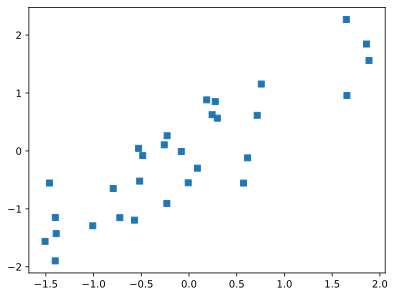

In [ ]:
# Create Data
N = 30
x = torch.randn(N, 1, dtype=torch.float)
y = x + torch.randn(N, 1, dtype=torch.float) / 2

# Plot the values
plt.plot(x.cpu(), y.cpu(), "s")
plt.show()

In [ ]:
# Build the model
ANN_reg = nn.Sequential(
    nn.Linear(1, 1),  # This is the Input layer
    nn.ReLU(),  # Activation Function
    nn.Linear(1, 1),  # This the Output Layer
)

ANN_reg

Sequential(
  (0): Linear(in_features=1, out_features=1, bias=True)
  (1): ReLU()
  (2): Linear(in_features=1, out_features=1, bias=True)
)

In [ ]:
# Learning Rate
lr = 0.05

# Loss Function
lossFunction = nn.MSELoss()

# Optimizer (Gradient Descent flavour to implement)
optimizer = torch.optim.SGD(ANN_reg.parameters(), lr=lr)

In [ ]:
# Model training